<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/spring2021/blob/master/week08.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Week08 -- Linear regression


In [ ]:
# Generate some synthetic data: linear model plus random noise
import random
import numpy as np
import matplotlib.pyplot as plt

# Model
w0 = 3
w1 = 0.042
xs = np.arange(0,10)
ys = w0 + w1 * xs

# Noise
mu, sigma = 0, 0.1 # mean and standard deviation
random.seed(42) # for reproducibility
eps = [random.normalvariate(mu, sigma) for i in enumerate(xs)]

# Data
data = ys + eps

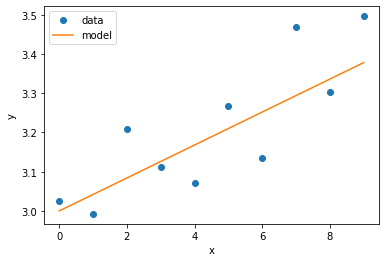

In [ ]:
# Visualization with matplotlib
plt.plot(xs, data,'o', label='data')
plt.plot(xs, ys, label='model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend();

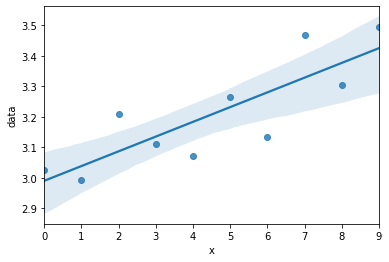

In [ ]:
# Visualizing linear regression with seaborn
import seaborn as sns
import pandas as pd

array = np.array([xs, data]).transpose()
df_simple = pd.DataFrame(data=array, index=xs, columns=['x', 'data'])

sns.regplot(x='x', y='data', data=df_simple);

# diamonds dataset


* [diamonds dataset](https://ggplot2.tidyverse.org/reference/diamonds.html) -- tidyverse.org


In [ ]:
diamonds = pd.read_csv("https://github.com/pbogden/pbogden.github.io/raw/master/diamonds.csv")

diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


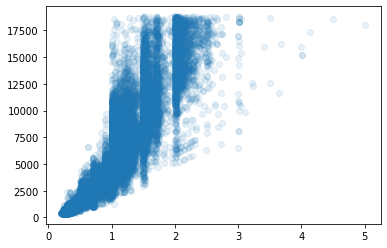

In [ ]:
plt.scatter(diamonds['carat'], diamonds['price'], alpha=0.1);

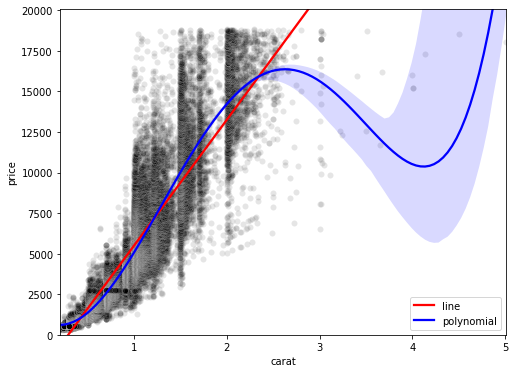

In [10]:
# Use the entire dataset (this cell takes ~30 seconds)
df = diamonds

# Subsample the data (this runs in ~2 seconds)
#df = df.iloc[::10, :]

# For styling, see: https://seaborn.pydata.org/generated/seaborn.regplot.html
line_kws = {'color':'red'}
curve_kws = {'color': 'blue'}

# Least squares line and polynomial
sns.scatterplot(x="carat", y="price", data=df, alpha=.1, color="black")
sns.regplot(x="carat", y="price", data=df, order=0, scatter=False, line_kws=line_kws, label="line")
sns.regplot(x="carat", y="price", data=df, order=5, scatter=False, line_kws=curve_kws, label="polynomial")

# figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# axis limits and legend
fig.gca().legend()
fig.gca().set_ylim([0, 20100]);

# Linear regression with scikit-learn

In [ ]:
# This cell reviews some data management with pandas & numpy
# Use the entire dataset
df = diamonds

# Reminder: there are two ways to extract a column from a dataframe
X = df['carat']
X2 = df[['carat']]

# One way returns a series, the other returns a dataframe
assert isinstance(X, pd.core.series.Series)
assert isinstance(X2, pd.core.frame.DataFrame)

# They contain the same number of variables, but they have different shapes
assert X.shape == (53940,)
assert X2.shape == (53940,1)

# You can turn each of these into numpy arrays
X = X.values
X2 = X2.values

assert isinstance(X, np.ndarray)
assert isinstance(X2, np.ndarray)

# But they still have different shapes
assert X.shape == (53940,)
assert X2.shape == (53940,1)

# You can use X2 as the first argument in the sklearn .fit() method
# If you try to use X as the first argument in .fit(), you'll get an error
# The .fit() method expects an 2-D matrix

# You can turn X into a matrix as follows
X = X.reshape(-1,1)
assert X.shape == (53940,1)
assert X.shape == X2.shape

In [13]:
# Linear regression with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

# Use the entire dataset (takes ~30 seconds)
df = diamonds

# Fit the model to the data
model = LinearRegression()
model.fit(df[['carat']], df['price'])

# Evaluate the performance
yhat = model.predict(df[['carat']])
print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(df['price'], yhat)))

Explained variance: 84.93%


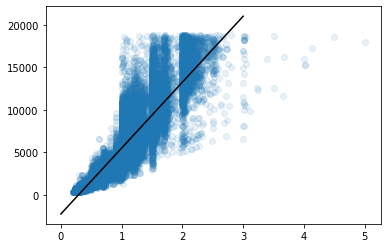

In [14]:
# Plot the model prediction (no noise) as a smooth curve
X_model = [[0], [3]] # dependent variable, no noise
yhat_model = model.predict(X_model) # compute the model prediction

plt.plot(X_model, yhat_model, color='k')

# Plot the data (scatterplot)
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.show();